# Visualization Notebook

### Import all cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import scipy.stats as st
import math
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime


# suppress futurewarnings from statistical packages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.ticker as mticker
from tabulate import tabulate
import plotly
import plotly.express as px

#read data

zip_file = "../Dataset/AB_US_2020.zip"
try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("../Dataset/unZipped/")
        print("Extracted all")
except:
    print("Invalid file")
    
airbnbDS = pd.read_csv("../Dataset/unZipped/AB_US_2020.csv")

#Going to drop neighbourhood_group because of half of the values are null. For both name and host name I will fill the
#empty slots with "N/A", there is very few missing and I do not think name will be very important to regesion on price.
#For all null values in reviews_per_month will be replaced with 0.


airbnbDS = airbnbDS.drop("neighbourhood_group", axis = 1)


airbnbDS = airbnbDS.fillna(value= {'name': 'N/A', 'host_name':'N/A', 'reviews_per_month': 0})

airbnbDS = airbnbDS.dropna()

room_ID_dic = {'Entire home/apt': 1, 'Private room': 2,'Shared room': 3, 'Hotel room': 4}

airbnbDS['room_type_ID'] = airbnbDS['room_type'].apply(lambda x: room_ID_dic[x])

city_ID_dic = {'Asheville' : 1, 'Austin' : 2, 'Boston' :3, 'Broward County' :4, 'Cambridge':5,
       'Chicago':6, 'Clark County':7, 'Columbus':8, 'Denver':9, 'Hawaii':10,
       'Jersey City':11, 'Los Angeles':12, 'Nashville':13, 'New Orleans':14,
       'New York City':15, 'Oakland':16, 'Pacific Grove':17, 'Portland':18,
       'Rhode Island':19, 'Salem':20, 'San Clara Country':21, 'San Diego':22,
       'San Francisco':23, 'San Mateo County':24, 'Santa Cruz County':25,
       'Seattle':26, 'Twin Cities MSA':27, 'Washington D.C.':28}


airbnbDS['city_ID'] = airbnbDS['city'].apply(lambda x: city_ID_dic[x])

airbnbDS['last_review'] = pd.to_datetime(airbnbDS['last_review'])

airbnbDS['days_since_last_review'] = datetime.now() - airbnbDS['last_review']

airbnbDS['days_since_last_review'] = airbnbDS['days_since_last_review'].dt.days

airbnbDS["Profit"] = airbnbDS['price'] * (airbnbDS['availability_365'])

Extracted all


C:\Users\clineman\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
airbnbDS

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,room_type_ID,city_ID,days_since_last_review,Profit
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville,2,1,1062,0
1,80905,French Chic Loft,427027,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville,1,1,918,135360
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville,1,1,1140,22350
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville,1,1,843,0
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville,2,1,2643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225936,45326130,Modern and cozy home located in Washington DC,55489711,Amir,"Union Station, Stanton Park, Kingman Park",38.90101,-77.00283,Entire home/apt,144,1,1,2020-09-18,1.00,1,328,Washington D.C.,1,28,847,47232
225950,45349877,Penthouse w/ Patio ‚òÜ Capitol Hill Condo ‚òÜ ...,3850096,Ije,"Capitol Hill, Lincoln Park",38.88703,-77.00586,Entire home/apt,132,2,1,2020-09-16,1.00,8,162,Washington D.C.,1,28,849,21384
225955,45352724,MODERN ‚òÜ Well-Located Shaw Town Home ‚òÜ 2BR...,3850096,Ije,"Howard University, Le Droit Park, Cardozo/Shaw",38.91626,-77.02074,Entire home/apt,112,2,1,2020-09-13,1.00,8,171,Washington D.C.,1,28,852,19152
225964,45385834,Brand new modern apartment with private entry,16561471,Victor,"Brightwood Park, Crestwood, Petworth",38.94358,-77.01283,Entire home/apt,78,1,1,2020-09-19,1.00,1,75,Washington D.C.,1,28,846,5850


## visulizations

Word cloud to show the most frequently used words in the description name

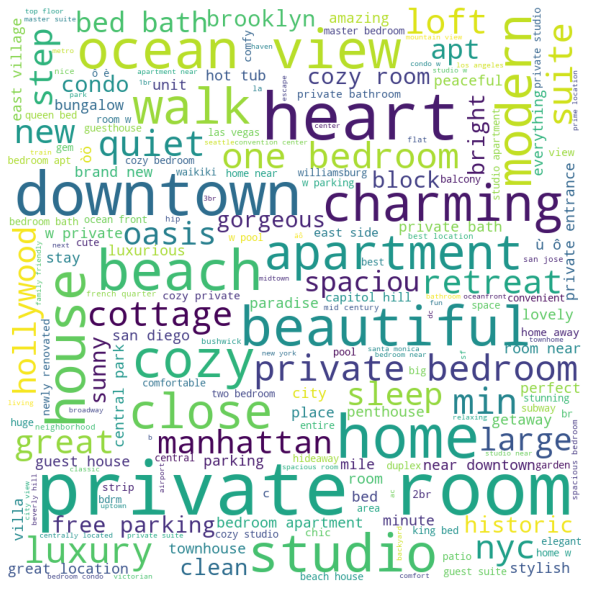

In [3]:
comment = ''
stopwords = set(STOPWORDS)

for i in airbnbDS['name']:
    i = str(i)
    
    tocken = i.split()
    
    for j in range(len(tocken)):
        tocken[j] = tocken[j].lower()
        
    comment += " ".join(tocken)+ " "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Heat map to see if there is any correlations between price and all other numberic columns

In [4]:
airbnbDS.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_ID,city_ID,days_since_last_review,Profit
id,1.000000,0.540372,-0.038278,0.014312,0.017370,-0.001539,-0.368653,0.072170,0.076238,-0.029554,0.001836,-0.075898,-0.356766,0.006527
host_id,0.540372,1.000000,-0.042855,0.020033,0.005994,-0.002218,-0.177309,0.078894,-0.029259,0.029986,0.062315,-0.072053,-0.211447,0.009021
latitude,-0.038278,-0.042855,1.000000,0.558152,-0.058386,0.000711,0.050037,0.053906,-0.203682,-0.177410,0.138919,0.448815,0.119590,-0.100235
longitude,0.014312,0.020033,0.558152,1.000000,-0.049598,-0.001756,-0.040210,-0.021908,-0.213236,-0.148488,0.112847,-0.046814,0.126213,-0.078700
price,0.017370,0.005994,-0.058386,-0.049598,1.000000,-0.000642,-0.060874,-0.055226,0.076714,0.047300,-0.122937,-0.004054,0.002119,0.701144
minimum_nights,-0.001539,-0.002218,0.000711,-0.001756,-0.000642,1.000000,-0.001247,-0.001790,-0.000738,-0.002710,0.002822,0.003087,0.005172,-0.000868
number_of_reviews,-0.368653,-0.177309,0.050037,-0.040210,-0.060874,-0.001247,1.000000,0.732273,-0.113825,0.068520,-0.039671,0.040011,-0.255399,-0.041179
reviews_per_month,0.072170,0.078894,0.053906,-0.021908,-0.055226,-0.001790,0.732273,1.000000,-0.113099,0.043291,-0.074901,0.007045,-0.389714,-0.041754
calculated_host_listings_count,0.076238,-0.029259,-0.203682,-0.213236,0.076714,-0.000738,-0.113825,-0.113099,1.000000,0.132094,-0.089915,-0.032374,-0.047839,0.081964
availability_365,-0.029554,0.029986,-0.177410,-0.148488,0.047300,-0.002710,0.068520,0.043291,0.132094,1.000000,-0.025836,-0.081520,-0.241980,0.331318


<AxesSubplot:>

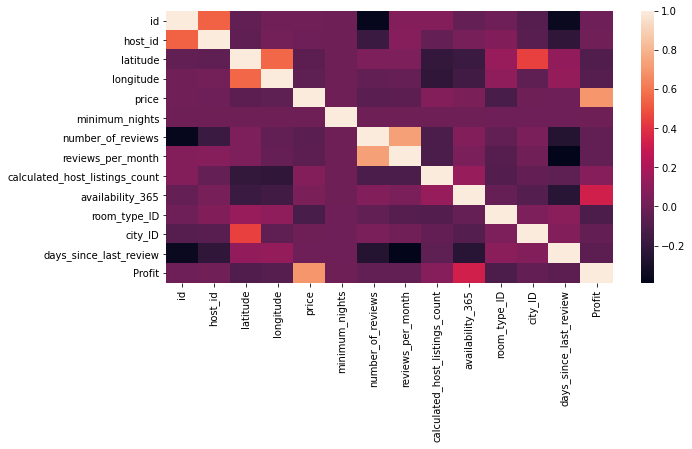

In [5]:
plt.figure(figsize = (10,5))
sns.heatmap(airbnbDS.corr())

Price does not have any correlations besides our self created column of price and a small correlation between room available. 

Showing prices compared to other categories

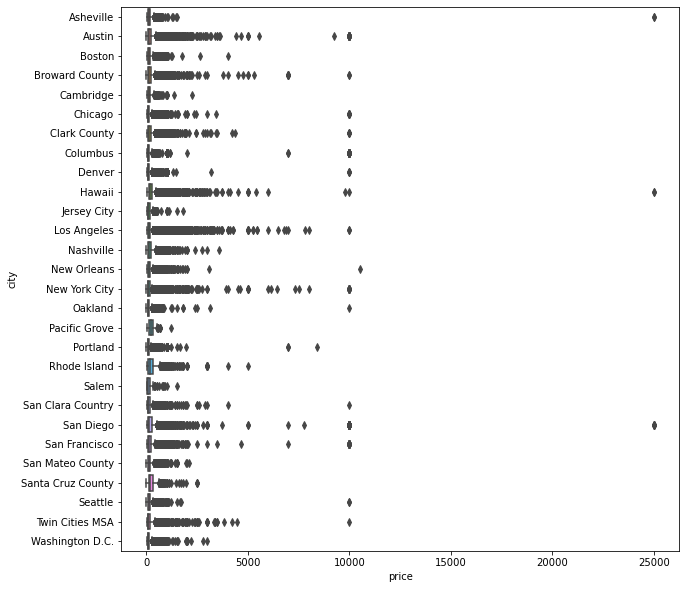

In [6]:
plt.figure(figsize = (10,10))
box_plot = sns.boxplot(x='price', y='city', 
                 data=airbnbDS)

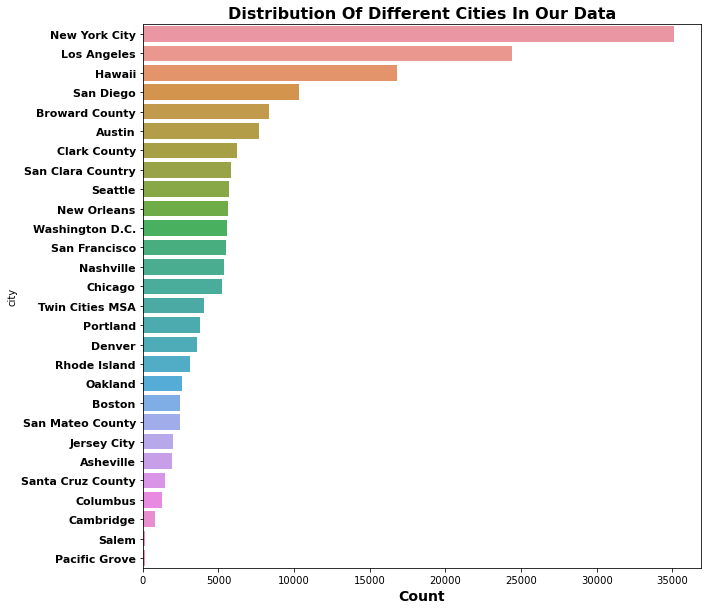

In [7]:
plt.figure(figsize = (10,10))
ax = sns.countplot(y=airbnbDS['city'],order=airbnbDS['city'].value_counts().index)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=11,fontweight='bold')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=14,fontweight='bold')
plt.show()

In [8]:
airbnbDS

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,room_type_ID,city_ID,days_since_last_review,Profit
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville,2,1,1062,0
1,80905,French Chic Loft,427027,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville,1,1,918,135360
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville,1,1,1140,22350
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville,1,1,843,0
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville,2,1,2643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225936,45326130,Modern and cozy home located in Washington DC,55489711,Amir,"Union Station, Stanton Park, Kingman Park",38.90101,-77.00283,Entire home/apt,144,1,1,2020-09-18,1.00,1,328,Washington D.C.,1,28,847,47232
225950,45349877,Penthouse w/ Patio ‚òÜ Capitol Hill Condo ‚òÜ ...,3850096,Ije,"Capitol Hill, Lincoln Park",38.88703,-77.00586,Entire home/apt,132,2,1,2020-09-16,1.00,8,162,Washington D.C.,1,28,849,21384
225955,45352724,MODERN ‚òÜ Well-Located Shaw Town Home ‚òÜ 2BR...,3850096,Ije,"Howard University, Le Droit Park, Cardozo/Shaw",38.91626,-77.02074,Entire home/apt,112,2,1,2020-09-13,1.00,8,171,Washington D.C.,1,28,852,19152
225964,45385834,Brand new modern apartment with private entry,16561471,Victor,"Brightwood Park, Crestwood, Petworth",38.94358,-77.01283,Entire home/apt,78,1,1,2020-09-19,1.00,1,75,Washington D.C.,1,28,846,5850


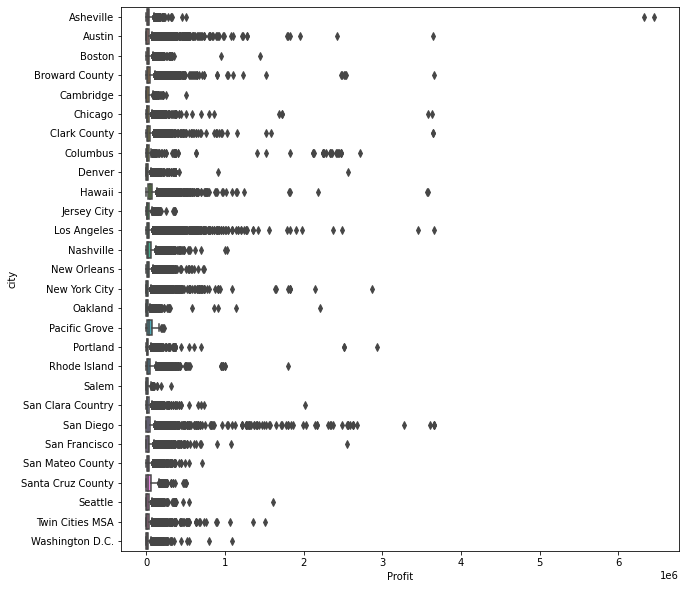

In [9]:
plt.figure(figsize = (10,10))
box_plot = sns.boxplot(x='Profit', y='city', 
                 data=airbnbDS)

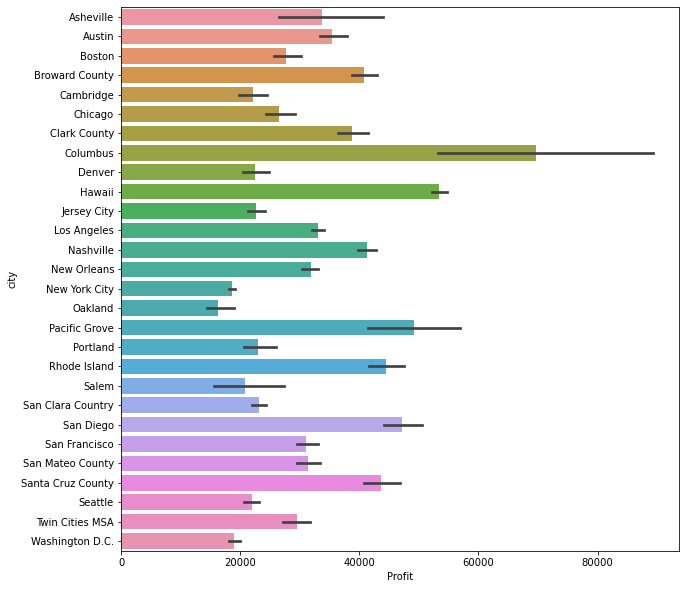

In [10]:
plt.figure(figsize = (10,10))
box_plot = sns.barplot(x='Profit', y='city', 
                 data=airbnbDS)

Showing the distubution of diffrent room types in the data

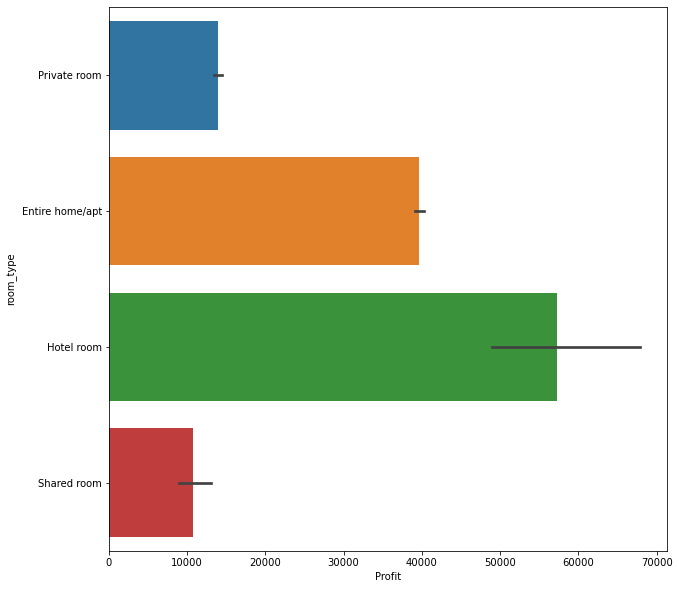

In [11]:
plt.figure(figsize = (10,10))
box_plot = sns.barplot(x='Profit', y='room_type', 
                 data=airbnbDS)

Showing the distrubution of pricing throughout the data set

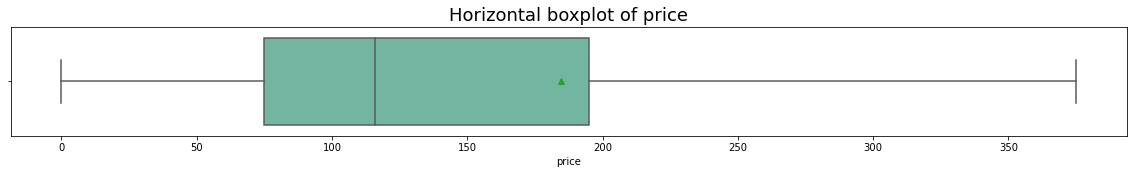

In [12]:
plt.figure(figsize=(20,2))
plt.title("Horizontal boxplot of price", size=18)
sns.boxplot(x="price", data=airbnbDS, showfliers = False, showmeans=True, palette="Set2")
plt.show()

After this preliminary data investigation, we are ready to start building out some models to predict the price of a rental property.